In [1]:
# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# 2️⃣ Load Excel File
file_path = r"D:\personal\bdas.spyberpolymath.com\project\data\Financial_Statement.xlsx"
df = pd.read_excel(file_path)

In [3]:
# 3️⃣ Inspect Data
print("First 5 rows:")
display(df.head())

First 5 rows:


,Date,Asset,Price,RiskScore
0,2025-01-01,BondC,486.31,0.91
1,2025-01-02,ETF1,398.81,0.24
2,2025-01-03,StockA,472.77,0.14
3,2025-01-04,BondC,452.67,0.49
4,2025-01-05,BondC,319.05,0.99


In [4]:
print("\nData Info:")
print(df.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       100 non-null    datetime64[ns]
 1   Asset      100 non-null    object        
 2   Price      100 non-null    float64       
 3   RiskScore  100 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 3.3+ KB
None


In [5]:
# 4️⃣ Basic Descriptive Statistics
print("\nSummary Statistics:")
display(df.describe())


Summary Statistics:


,Date,Price,RiskScore
count,100,100.000000,100.000000
mean,2025-02-19 12:00:00,268.865500,0.516900
min,2025-01-01 00:00:00,52.480000,0.010000
25%,2025-01-25 18:00:00,159.875000,0.240000
50%,2025-02-19 12:00:00,267.355000,0.565000
75%,2025-03-16 06:00:00,397.180000,0.752500
max,2025-04-10 00:00:00,494.100000,0.990000
std,NaN,135.362119,0.298426


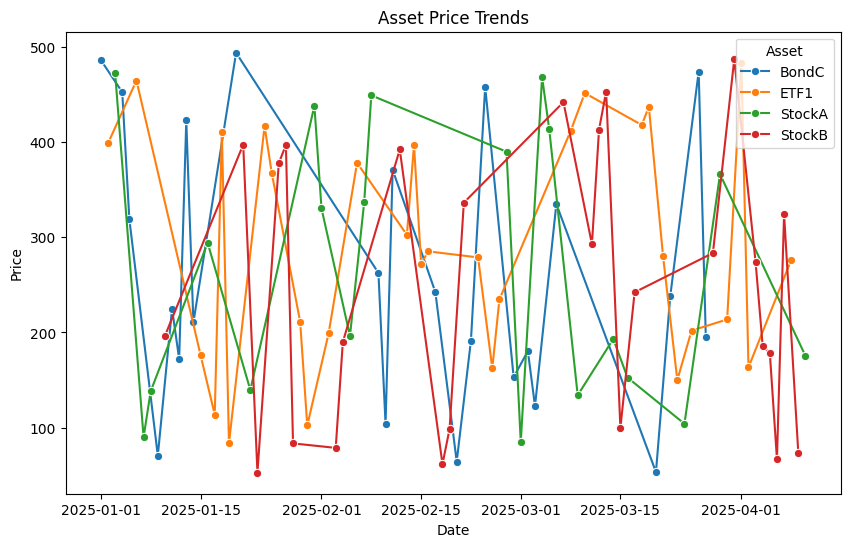

In [6]:
# 5️⃣ Visualize Asset Prices
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Date', y='Price', hue='Asset', marker='o')
plt.title("Asset Price Trends")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(title='Asset')
plt.show()

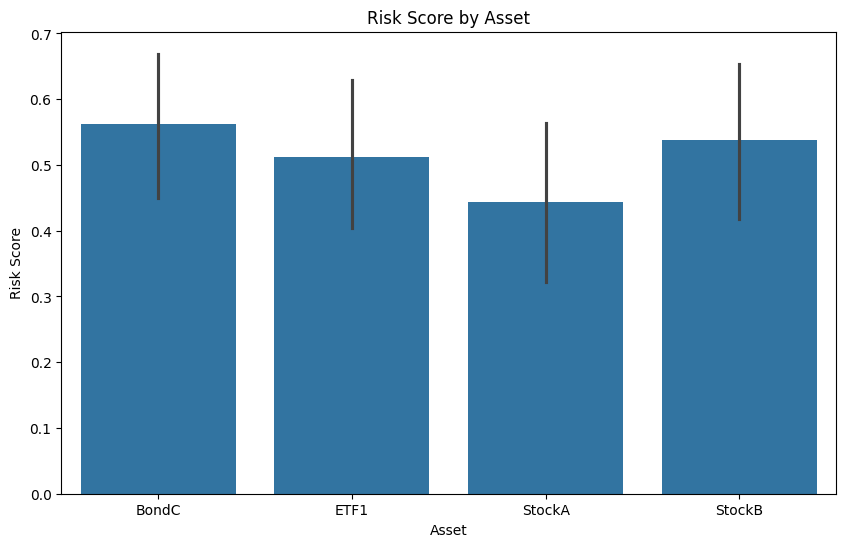

In [7]:
# 6️⃣ Risk Analysis Visualization
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Asset', y='RiskScore')
plt.title("Risk Score by Asset")
plt.xlabel("Asset")
plt.ylabel("Risk Score")
plt.show()

In [8]:
# 7️⃣ Time Series Forecast Example for StockA
stock_data = df[df['Asset']=='StockA'][['Date','Price']].set_index('Date')
stock_data = stock_data.sort_index()
model = sm.tsa.SimpleExpSmoothing(stock_data['Price']).fit()
forecast = model.forecast(5)

D:\personal\bdas.spyberpolymath.com\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\personal\bdas.spyberpolymath.com\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\personal\bdas.spyberpolymath.com\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [9]:
print("\nForecasted Prices for next 5 periods:")
print(forecast)


Forecasted Prices for next 5 periods:
20    226.283919
21    226.283919
22    226.283919
23    226.283919
24    226.283919
dtype: float64
